In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [4]:
df=df.drop(['id','author','text'],axis='columns')
df.head()

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


In [5]:
df['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [6]:
df.isnull().sum()

title    558
label      0
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

title    0
label    0
dtype: int64

In [9]:
df.shape

(20242, 2)

C:\Users\Shardul\.conda\envs\ShardulEnv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

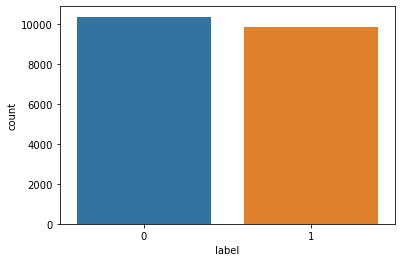

In [10]:
import seaborn as sns
sns.countplot('label',data=df)

In [11]:
X=df['title']
y=df['label']

In [12]:
import tensorflow as tf

In [13]:
from tensorflow import keras
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
vocb_size=5000

In [16]:
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [17]:
ps=PorterStemmer()
lm=WordNetLemmatizer()

In [21]:
corpus=[]
for i in range(len(X)):
    review=re.sub('[^a-zA-Z]',' ',X[i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in X if word not in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

KeyError: 53